# Explore here

In [5]:
# Your code here

import os
import pandas as pd
import requests
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. descargar data

url = "https://raw.githubusercontent.com/Rafa-Carrasco/arbol-de-regresion/main/data/processed/clean_diabetes_test.csv"
url2 = "https://raw.githubusercontent.com/Rafa-Carrasco/arbol-de-regresion/main/data/processed/clean_diabetes_train.csv"

respuesta = requests.get(url)
nombre_archivo = "clean_diabetes_test.csv"
with open(nombre_archivo, 'wb') as archivo:
    archivo.write(respuesta.content)

respuesta = requests.get(url2)
nombre_archivo = "clean_diabetes_train.csv"
with open(nombre_archivo, 'wb') as archivo:
    archivo.write(respuesta.content)

# 2. convertir csv en dataframe

X_tra = pd.read_csv("../data/processed/clean_diabetes_train.csv")
X_tes = pd.read_csv("../data/processed/clean_diabetes_test.csv")


# Separar las características y la variable objetivo para el conjunto de entrenamiento
X_train = X_tra.drop(columns='Outcome')
y_train = X_tra['Outcome']

# Separar las características y la variable objetivo para el conjunto de prueba
X_test = X_tes.drop(columns='Outcome')
y_test = X_tes['Outcome']

y_test.head()




0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [6]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=7,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    reg_alpha=0.5,
    objective='binary:logistic',
    eval_metric='auc',
    seed=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[76 23]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [9]:
# from pickle import dump
model.save_model("xgb_classifier_default_42.json")

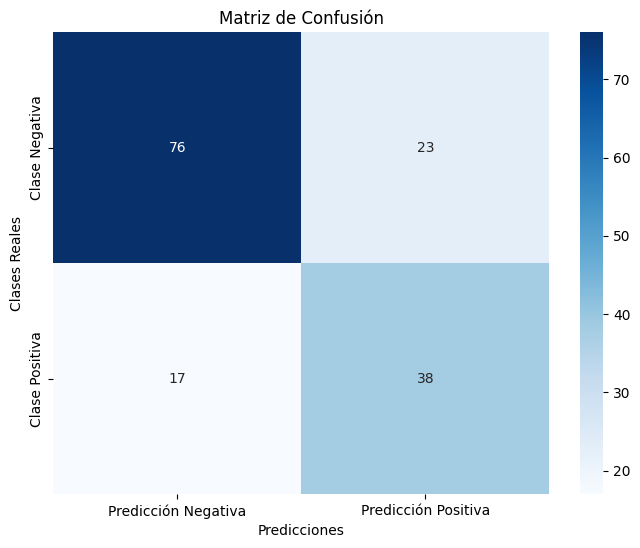

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear la gráfica de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción Negativa', 'Predicción Positiva'], yticklabels=['Clase Negativa', 'Clase Positiva'])
plt.xlabel('Predicciones')
plt.ylabel('Clases Reales')
plt.title('Matriz de Confusión')
plt.show()

añadir pantallazo de los otros dos modelos y comparar la accuracy para decidir cual es el mejor

PANTALLAZO DE RESULTADOS MODELO RANDOM FOREST: 
ACCURACY = 0.79

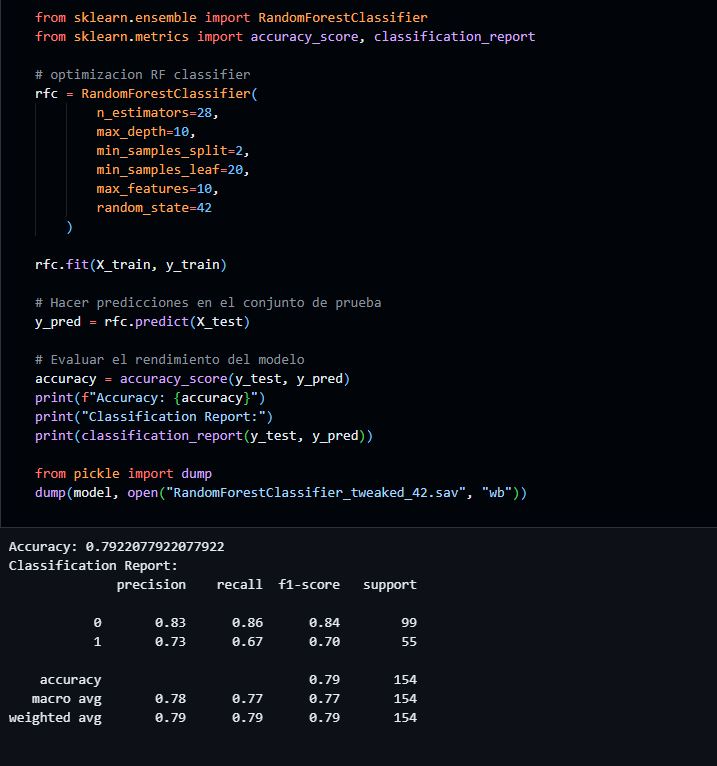

PANTALLAZO RESULTADOS DECISSION TREE CLASSIFIER (OPTIMIZADO)
ACCURACY = 0.79

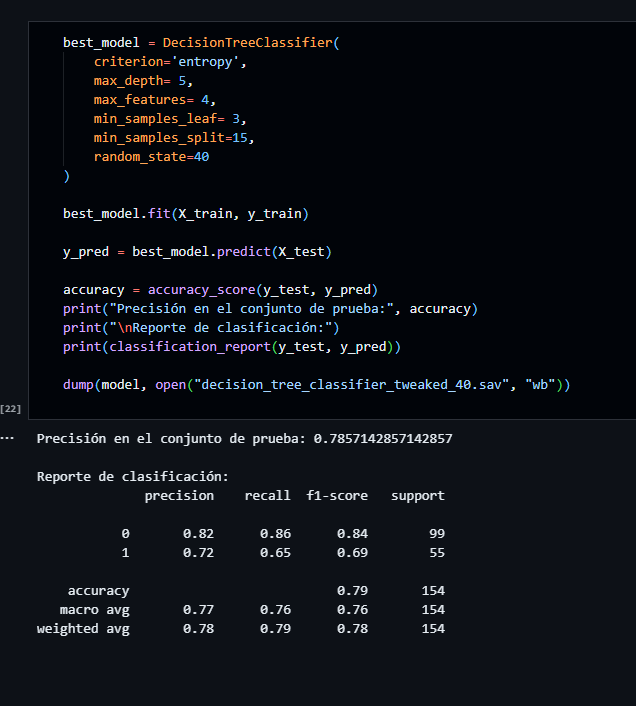

RESULTADOS MODELO BOOSTING: ACCURACY = 0.74

RESULTADOS MODELO RANDOM FOREST: ACCURACY = 0.79

RESULTADOS DECISSION TREE CLASSIFIER (OPTIMIZADO): ACCURACY = 0.79
